# Code to reproduce Figure 4

In [1]:
import datetime
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['font.family'] = ['Arial']

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read in timing for compute on each node in the Pool, from timing results text files
Save compute time as the average of each node

In [3]:
def read_scaling_record(filename,cpu):
    with open(filename) as f:
        lines = f.read().split('\n')
        node_list = []
        times = []
        for l in lines:
            if len(l) > 1:
                node_list.append(int(l.split(',')[0]))
                times.append(float(l.split(',')[1]))
        av_times = []
        nodes = []
        cpus = []
        for n in np.unique(node_list):
            time_list = [times[i] for i,e in enumerate(node_list) if e==n]
            av_times.append(np.mean(time_list))
            nodes.append(n)
            cpus.append(n*cpu)
        
    return(nodes,cpus,av_times)

In [4]:
e4 = 'timing_results/timing_tm_standard_e4_v3.txt'
ml = 'timing_results/timing_ml_standard_f4s.txt'

In [5]:
nodes4,cpus4,times4 = read_scaling_record(e4,4)
nodesML,cpusML,timesML = read_scaling_record(ml,4)

## Calculate cost associated with each compute

#### Below for the CPU-only runs

In [6]:
# Cost of standard_e4_v3 machine per hour in WestUS2 in $
e4_hour = 0.252
cost4 = [nodes4[i] * ((times4[i]/3600)*e4_hour) for i in range(len(nodes4))]
f4s_hour = 0.199
costML = [nodesML[i] * ((timesML[i]/3600)*f4s_hour) for i in range(len(nodesML))]

#### Below for the local runs of machine learning with GPU- we manually input the times here from local records

In [7]:
tm_gpu_nodes = [1,2,4]
tm_gpu_cpus = [24,48,96]
tm_gpu_times = [6164,3171,2302]
# For NC6 v3
gpu_hour = 3.67
tm_gpu_cost = [tm_gpu_nodes[i] * ((tm_gpu_times[i]/3600)*gpu_hour) for i in range(len(tm_gpu_nodes))]

## Plot everything together

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


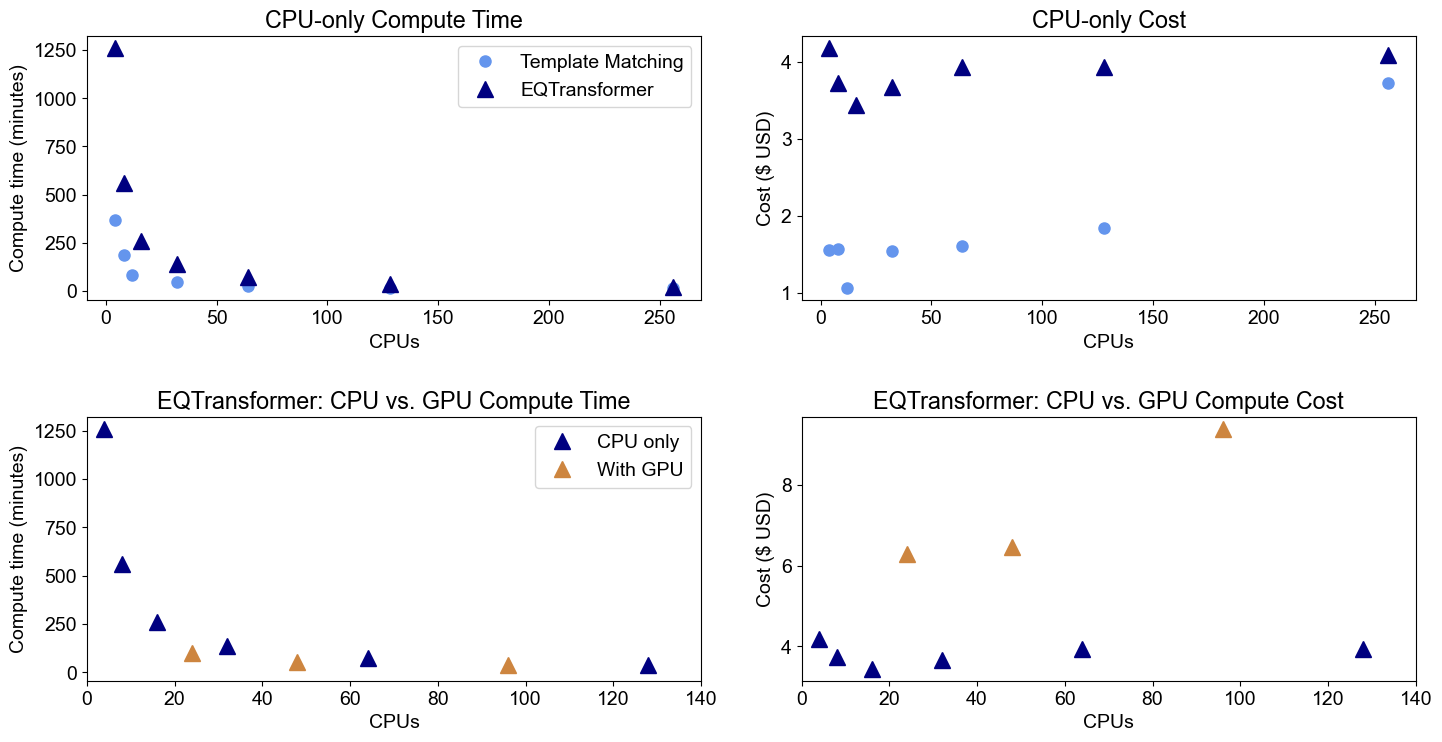

In [8]:
matplotlib.rcParams.update({'font.size': 14})
fig,ax = plt.subplots(2,2,figsize=(15,8))

l1, = ax[0,0].plot(cpus4,[t/60 for t in times4],'.', color='cornflowerblue',markersize=16,label='Template Matching')
l2, = ax[0,0].plot(cpusML,[t/60 for t in timesML],'^', color='navy',label='EQTransformer',markersize=12)
ax[0,0].set_xlabel('CPUs')
ax[0,0].set_ylabel('Compute time (minutes)')
ax[0,0].legend()
ax[0,0].title.set_text('CPU-only Compute Time')
#ax[0,0].set_yscale('log')
#ax[0].set_xlim([20,300])

l1, = ax[0,1].plot(cpus4,cost4,'.', color='cornflowerblue',markersize=16,label='Template Matching')
l2, = ax[0,1].plot(cpusML,costML,'^', color='navy',label='EQTransformer',markersize=12)
ax[0,1].set_xlabel('CPUs')
ax[0,1].set_ylabel('Cost ($ USD)')
ax[0,1].title.set_text('CPU-only Cost')
#ax[1].set_xlim([20,300])

# PHASENET
l1, = ax[1,0].plot(cpusML,[t/60 for t in timesML],'^', color='navy',label='CPU only',markersize=12)
l1, = ax[1,0].plot(tm_gpu_cpus,[t/60 for t in tm_gpu_times],'^', color='peru',label='With GPU',markersize=12)
ax[1,0].set_xlim([0,140]);
ax[1,0].set_xlabel('CPUs')
ax[1,0].set_ylabel('Compute time (minutes)')
ax[1,0].title.set_text('EQTransformer: CPU vs. GPU Compute Time')
ax[1,0].legend()

l3, = ax[1,1].plot(cpusML,costML, '^',color='navy',markersize=12)
l3, = ax[1,1].plot(tm_gpu_cpus,tm_gpu_cost, '^',color='peru',markersize=12)
ax[1,1].set_xlim([0,140]);
ax[1,1].set_xlabel('CPUs')
ax[1,1].set_ylabel('Cost ($ USD)')
ax[1,1].title.set_text('EQTransformer: CPU vs. GPU Compute Cost')

# using padding
fig.tight_layout(pad=2.0)

plt.show()